# Loading The Data

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Suicide_rates.csv to Suicide_rates.csv


# Importing Relevant Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading the Data

In [3]:
df = pd.read_csv('Suicide_rates.csv')

display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
print("Number of records are: ", df.shape[0])
print("Number of variables are: ", df.shape[1])

# Getting number of records with at least one missing entry
missing_rec = df.isnull().any(axis = 1).sum()

# Getting number of records with no missing entry
non_missing_rec = df.shape[0] - df.isnull().any(axis = 1).sum()

print("Number of records with no missing entries:", non_missing_rec)

Number of records are:  27820
Number of variables are:  12
Number of records with no missing entries: 8364


In [5]:
for col in df.columns.values:
    
    # Getting list of unique values in each column
    unique_list = pd.unique(df[col])

    print("Datatype of {} is: ".format(col), df[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))

    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(df[col])

    # Calculating total null values
    total_null = np.sum(is_null)

    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), df[col].shape[0] - total_null)

    print("---------------")

Datatype of country is:  object
Number of unique values for country are:  101
Number of missing entries for country are:  0
Number of non-missing entries for country are:  27820
---------------
Datatype of year is:  int64
Number of unique values for year are:  32
Number of missing entries for year are:  0
Number of non-missing entries for year are:  27820
---------------
Datatype of sex is:  object
Number of unique values for sex are:  2
Number of missing entries for sex are:  0
Number of non-missing entries for sex are:  27820
---------------
Datatype of age is:  object
Number of unique values for age are:  6
Number of missing entries for age are:  0
Number of non-missing entries for age are:  27820
---------------
Datatype of suicides_no is:  int64
Number of unique values for suicides_no are:  2084
Number of missing entries for suicides_no are:  0
Number of non-missing entries for suicides_no are:  27820
---------------
Datatype of population is:  int64
Number of unique values for po

From an overall look at the data, we can observe that country and sex are categorical/nominal variables, age and generation are ordinal variables due to the intrinsic ordering present in them. Further, year is a temporal variable, suicides_no and population are integers and the rest are continuous variables.

Further, since the HDI column has about 70% of it's data missing and would lead to a lot of unused records, it's best to drop this column. Further, since the column country-year dosen't give us any extra information relative to the country and year columns, it's best to drop that too.

In [6]:
# Dropping the HDI column
del df['HDI for year']

# Dropping the country-year column
del df['country-year']

# Changing all column names to remove unnecessary spaces in them
df.rename(columns = lambda x: x.strip(), inplace = True)

# Removing commas in GDP per year values of all records
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '').astype(float)

df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
gdp_for_year ($)      float64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [7]:
display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,6.306708e+10,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,6.306708e+10,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,6.306708e+10,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,6.306708e+10,2309,Generation Z


# Analysis of Discrete Variables

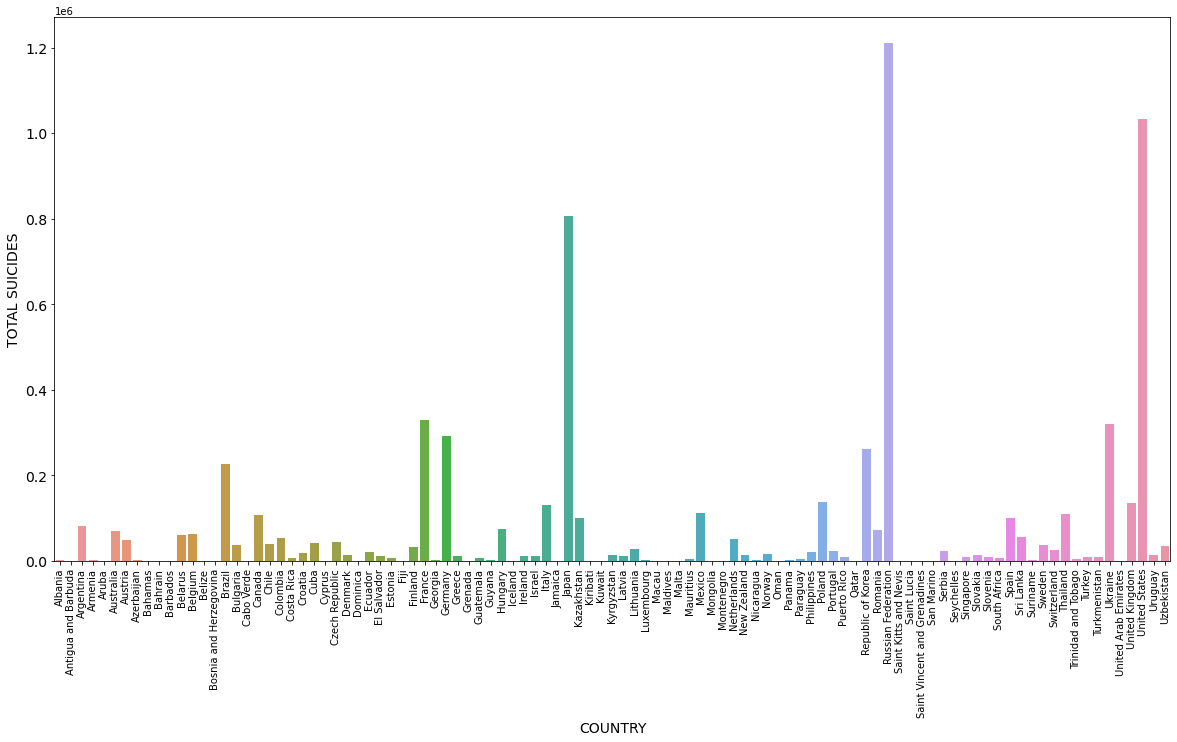

Mode value of suicides by country is:  1209742
Entropy value of suicides by country is:  3.120360942539527


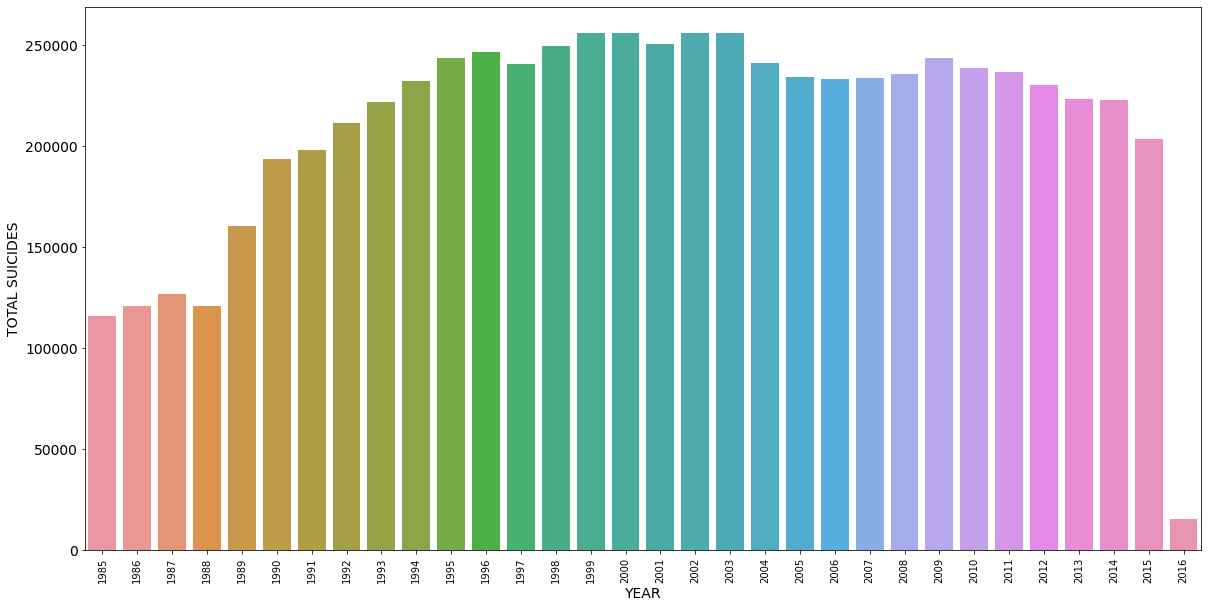

Mode value of suicides by year is:  256119
Entropy value of suicides by year is:  3.4211453347971115


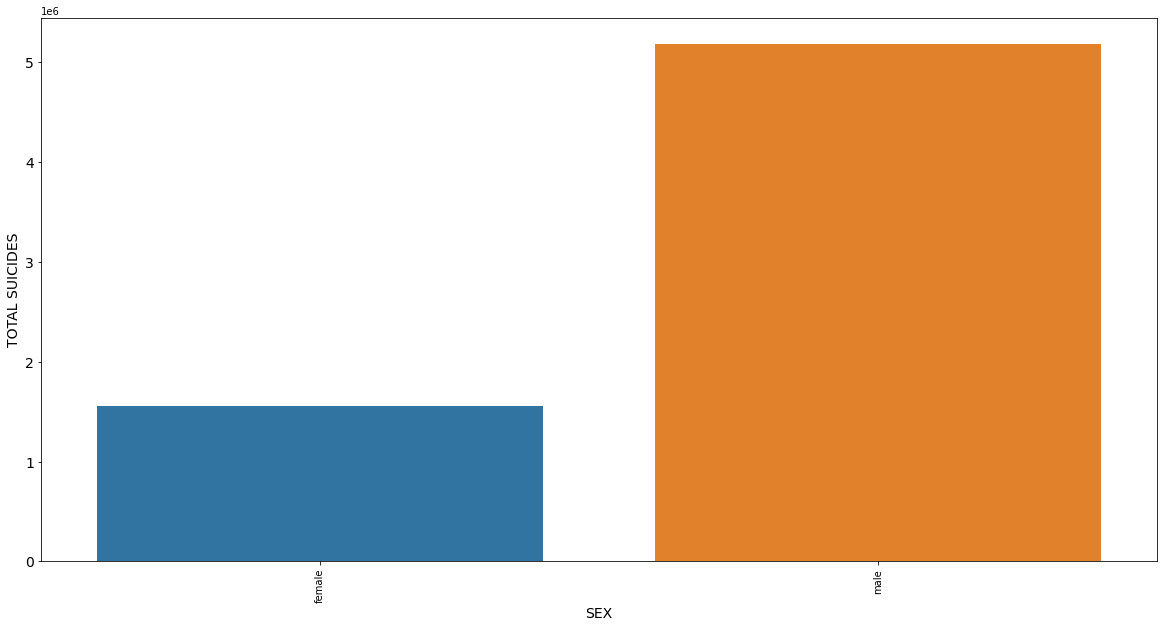

Mode value of suicides by sex is:  5188910
Entropy value of suicides by sex is:  0.5405931893058239


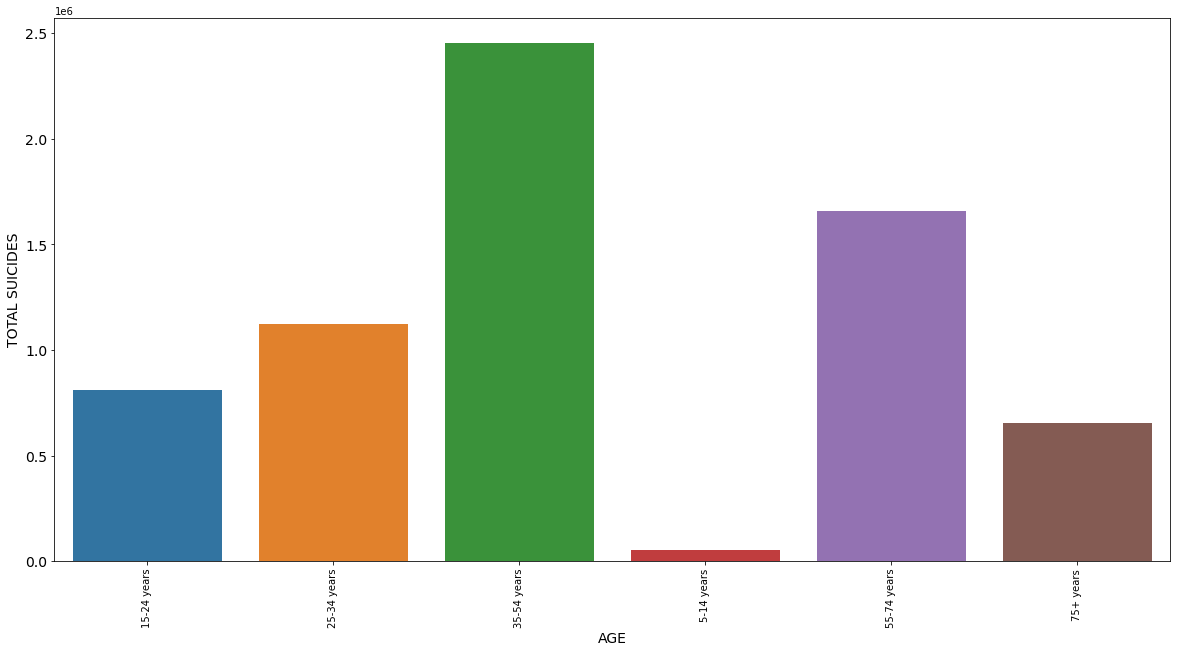

Mode value of suicides by age is:  2452141
Entropy value of suicides by age is:  1.5291566499288223


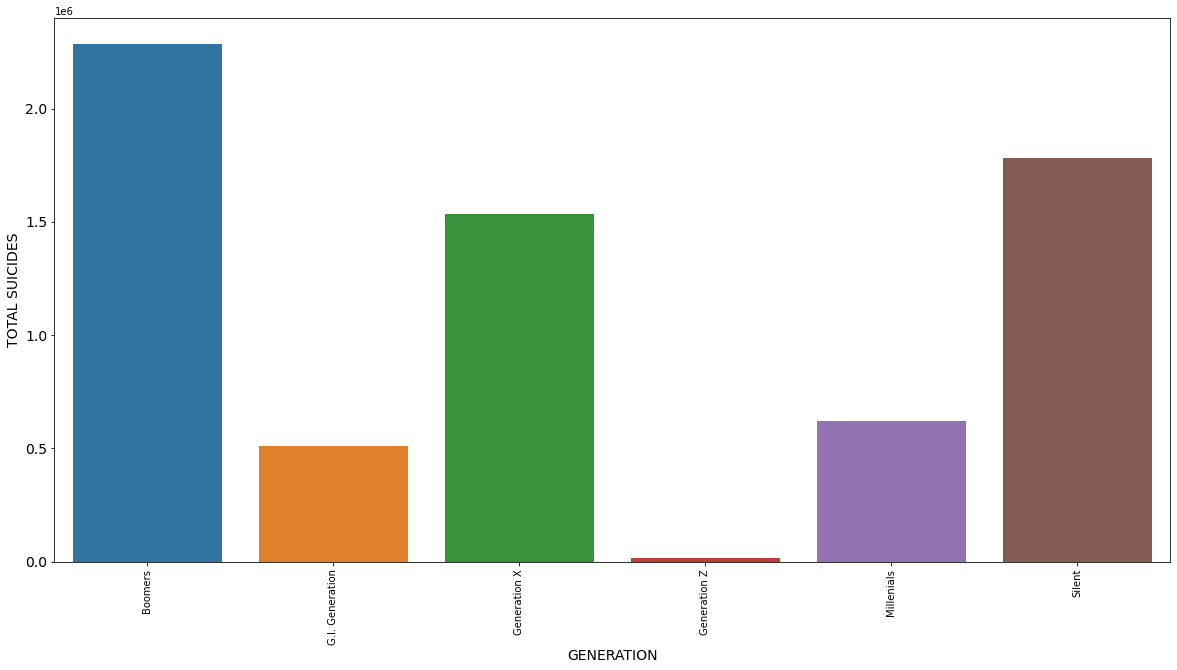

Mode value of suicides by generation is:  2284498
Entropy value of suicides by generation is:  1.484427773739379


In [31]:
from scipy import stats


for col in df.columns.values:

    if (df[col].dtypes == 'int64' or df[col].dtypes == 'object') and len(pd.unique(df[col])) < 120:

        # Getting the list of unique values assumed by a column
        unique_list = pd.unique(df[col])
        
        # Grouping the column values by the variable suicide_no
        df_grouped = df.groupby([col])['suicides_no'].sum().reset_index(name ='grouped_suicides')

        # Finding the total number of suicides
        total_suicides = df_grouped['grouped_suicides'].sum()
        
        # Getting the number of suicides by variable as a list
        suicides_list = list(df_grouped['grouped_suicides'])

        # Calculating the probability of suicide by variable
        suicides_prob = [s/float(total_suicides) for s in suicides_list]

        # Calculating the entropy of the variable distribution
        entropy = stats.entropy(suicides_prob)

        # Setting the figure size
        plt.figure(figsize=(20,10))
        
        # Rotating the labels in the x-axis
        plt.xticks(rotation=90)

        # Plotting the barplot and extracting relevant information from it 
        ax = sb.barplot(x = df_grouped[col], y = df_grouped['grouped_suicides'])

        # Adjusting label size in the x-axis
        plt.tick_params(axis='x', which='major', labelsize=10)
        plt.xlabel(col.upper(), fontsize = 14)

        # Adjusting label size in the x-axis
        plt.tick_params(axis='y', which='major', labelsize=14)
        plt.ylabel("TOTAL SUICIDES", fontsize = 14)
        plt.show()

        print("Mode value of suicides by {} is: ".format(col), df_grouped['grouped_suicides'].max())
        print("Entropy value of suicides by {} is: ".format(col), entropy)

From the above bar plots, it is evident that almost all variables have a somewhat non-uniform distribution when grouped by the number of suicides. We can extract useful information from these bar plots like the fact that far more males commit suicides than females, far more people in the age group of 35-54 years commit suicide relative to other groups etc.

# Analysis of Continuous Variables

Mean value of suicides_no is:  242.57440690150972
Variance value of suicides_no is:  813690.4442639275
Skew value of suicides_no is:  10.352910335856805
Minimum value of suicides_no is:  0
Maximum value of suicides_no is:  22338
Median value of suicides_no is:  25.0
25th percentile value of suicides_no is:  3.0
75th percentile value of suicides_no is:  131.0
Inter-quartile range of suicides_no is:  128.0


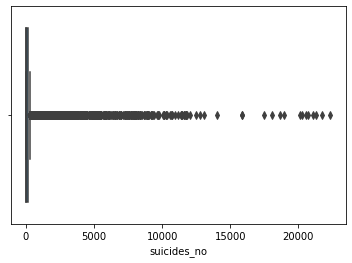

---------------
Mean value of population is:  1844793.6173975556
Variance value of population is:  15302018400947.766
Skew value of population is:  4.459414421535874
Minimum value of population is:  278
Maximum value of population is:  43805214
Median value of population is:  430150.0
25th percentile value of population is:  97498.5
75th percentile value of population is:  1486143.25
Inter-quartile range of population is:  1388644.75


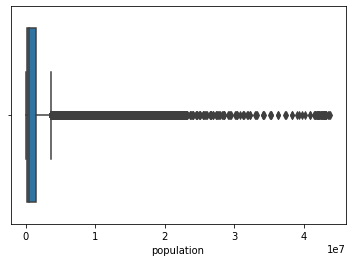

---------------
Mean value of suicides/100k pop is:  12.816097411933894
Variance value of suicides/100k pop is:  359.53889995312005
Skew value of suicides/100k pop is:  2.963414476605633
Minimum value of suicides/100k pop is:  0.0
Maximum value of suicides/100k pop is:  224.97
Median value of suicides/100k pop is:  5.99
25th percentile value of suicides/100k pop is:  0.92
75th percentile value of suicides/100k pop is:  16.62
Inter-quartile range of suicides/100k pop is:  15.700000000000001


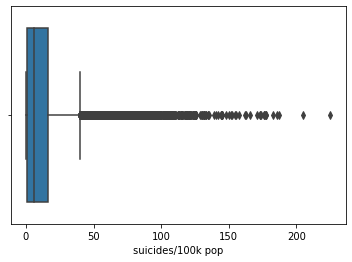

---------------
Mean value of gdp_for_year ($) is:  445580969025.7271
Variance value of gdp_for_year ($) is:  2.1129819912271505e+24
Skew value of gdp_for_year ($) is:  7.233755024143678
Minimum value of gdp_for_year ($) is:  46919625.0
Maximum value of gdp_for_year ($) is:  18120714000000.0
Median value of gdp_for_year ($) is:  48114688201.0
25th percentile value of gdp_for_year ($) is:  8985352832.0
75th percentile value of gdp_for_year ($) is:  260202429150.0
Inter-quartile range of gdp_for_year ($) is:  251217076318.0


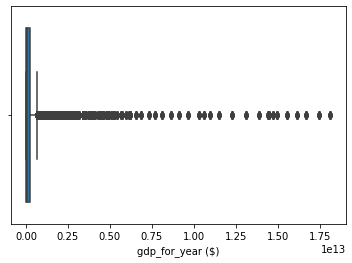

---------------
Mean value of gdp_per_capita ($) is:  16866.464414090584
Variance value of gdp_per_capita ($) is:  356740544.99342066
Skew value of gdp_per_capita ($) is:  1.9634699942792686
Minimum value of gdp_per_capita ($) is:  251
Maximum value of gdp_per_capita ($) is:  126352
Median value of gdp_per_capita ($) is:  9372.0
25th percentile value of gdp_per_capita ($) is:  3447.0
75th percentile value of gdp_per_capita ($) is:  24874.0
Inter-quartile range of gdp_per_capita ($) is:  21427.0


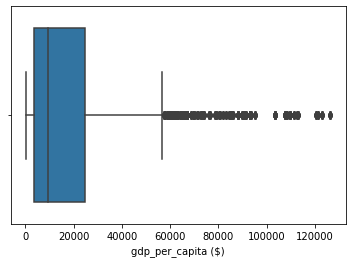

---------------


In [32]:
for col in df.columns.values:

    if (df[col].dtypes == 'int64' or df[col].dtypes == 'float64') and len(pd.unique(df[col])) >= 120:

        # Calculating the various parameters of the distribution
        print("Mean value of {} is: ".format(col), df[col].mean())
        print("Variance value of {} is: ".format(col), df[col].var())
        print("Skew value of {} is: ".format(col), df[col].skew())
        print("Minimum value of {} is: ".format(col), df[col].min())
        print("Maximum value of {} is: ".format(col), df[col].max())
        print("Median value of {} is: ".format(col), df[col].median())
        print("25th percentile value of {} is: ".format(col), df[col].quantile(0.25))
        print("75th percentile value of {} is: ".format(col), df[col].quantile(0.75))
        print("Inter-quartile range of {} is: ".format(col), df[col].quantile(0.75) - df[col].quantile(0.25))

        # Plotting the box and whiskers plot
        sb.boxplot(df[col])
        plt.show()

        print("---------------")

From the analysis of the above continuous variables, it's clear that the data is highly right-skewed for all variables.

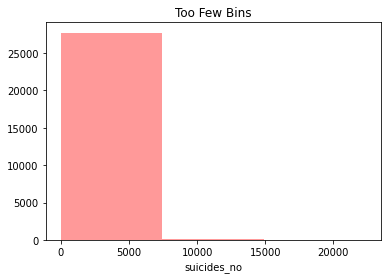

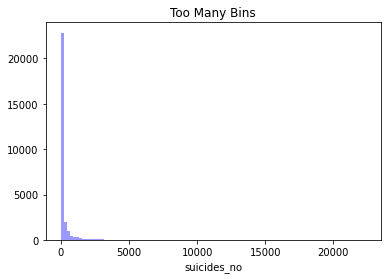

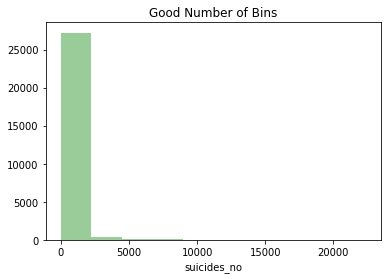

--------------


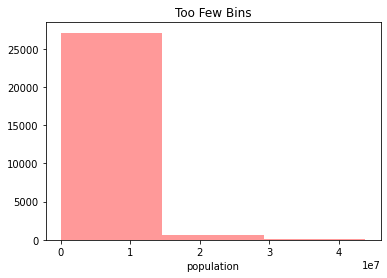

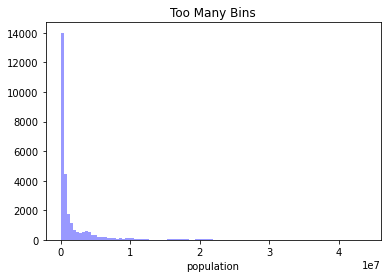

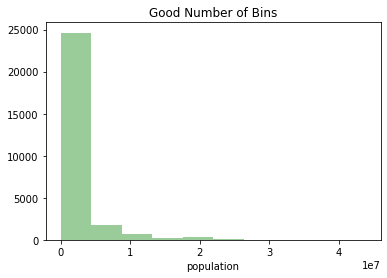

--------------


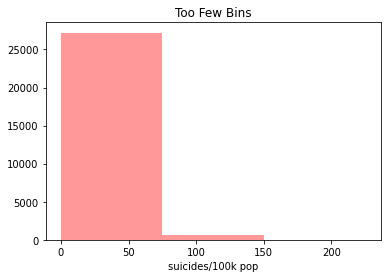

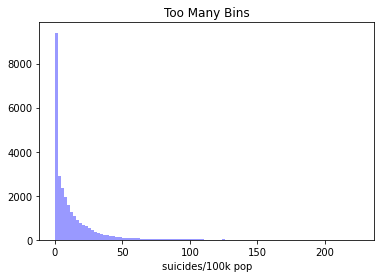

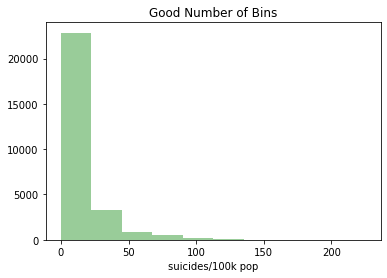

--------------


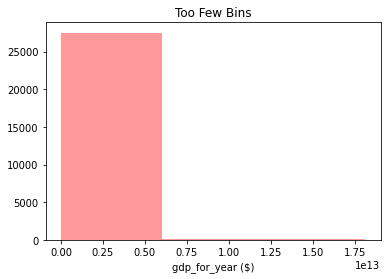

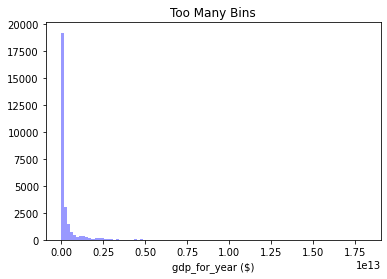

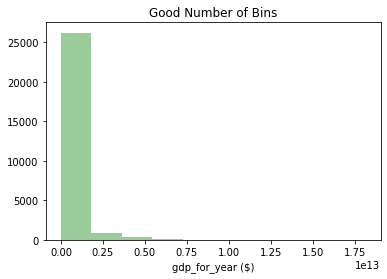

--------------


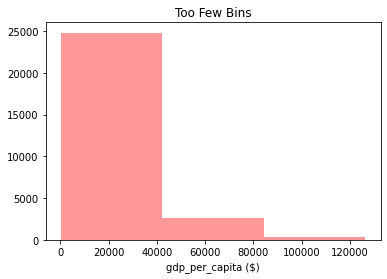

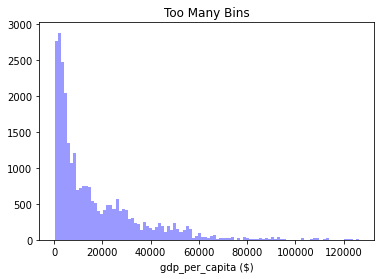

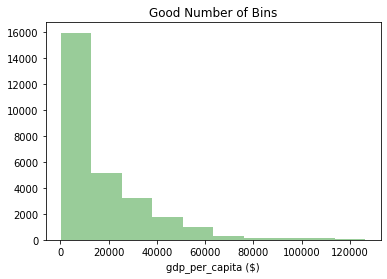

--------------


In [42]:
for col in df.columns.values:

    if (df[col].dtypes == 'int64' or df[col].dtypes == 'float64') and len(pd.unique(df[col])) >= 120:

        # Too few bins
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(1, 1, 1)
        ax1.set_title("Too Few Bins")
        sb.distplot(df[col], bins = 3, kde = False, color = "red")

        # Too many bins
        fig2 = plt.figure()
        ax2 = fig2.add_subplot(1, 1, 1)
        ax2.set_title("Too Many Bins")
        sb.distplot(df[col], bins = 100, kde = False, color = "blue")

        # Good number of bins
        fig3 = plt.figure()
        ax3 = fig3.add_subplot(1, 1, 1)
        ax3.set_title("Good Number of Bins")
        sb.distplot(df[col], bins = 10, kde = False, color = "green")

        plt.show()

        print("--------------")

# QQ Plot of All Continuous Variables

QQ plot for suicides_no against the normal distribution


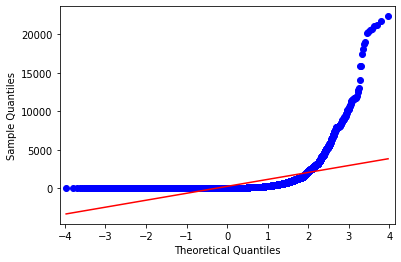

QQ plot for the natural log of suicides_no against the normal distribution


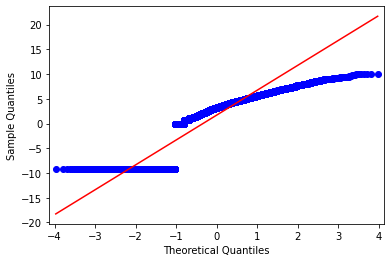

-----------------
QQ plot for population against the normal distribution


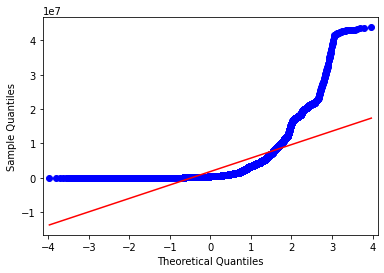

QQ plot for the natural log of population against the normal distribution


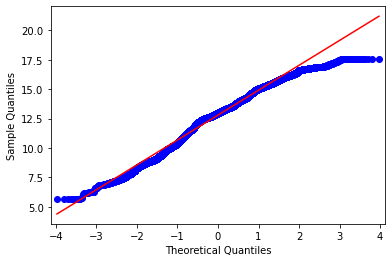

-----------------
QQ plot for suicides/100k pop against the normal distribution


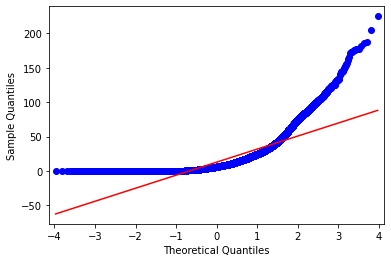

QQ plot for the natural log of suicides/100k pop against the normal distribution


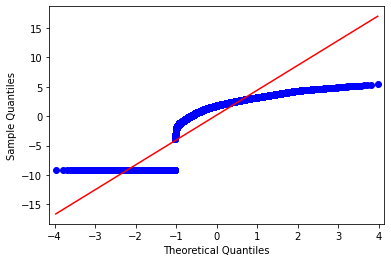

-----------------
QQ plot for gdp_for_year ($) against the normal distribution


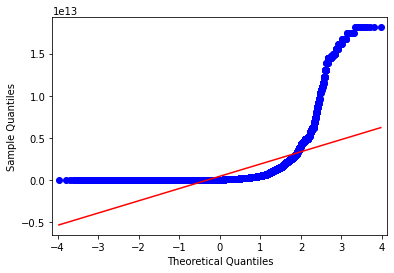

QQ plot for the natural log of gdp_for_year ($) against the normal distribution


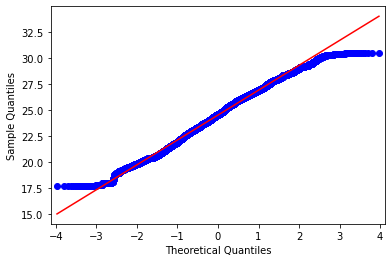

-----------------
QQ plot for gdp_per_capita ($) against the normal distribution


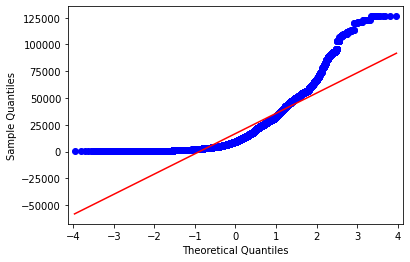

QQ plot for the natural log of gdp_per_capita ($) against the normal distribution


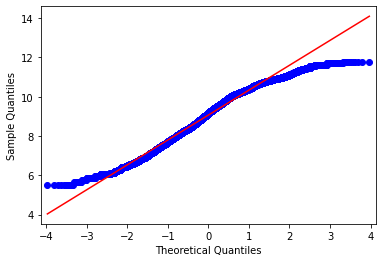

-----------------


In [48]:
import statsmodels.api as sm
import math

for col in df.columns.values:

    if (df[col].dtypes == 'int64' or df[col].dtypes == 'float64') and len(pd.unique(df[col])) >= 500:

        col_array = df[col]
        
        # Defining a small number to avoid log(0)
        epsilon = 0.0001

        # Taking element wise natural log of numpy array
        col_log = [math.log(i + epsilon) for i in col_array]

        print("QQ plot for {} against the normal distribution".format(col))
        fig = sm.qqplot(df[col].dropna(), line = 's')
        plt.show()

        print("QQ plot for the natural log of {} against the normal distribution".format(col))
        fig = sm.qqplot(np.array(col_log), line = 's')
        plt.show()

        print("-----------------")

The QQ plots of the original variables with the normal distribution do not agree with the normal line. On taking the natural log of the variables, population, gdp_for_year and gdp_per_capita agree somewhat strongly with a normal distribution giving an almost straight line indicating that they are log-normal.

# Plot of Discrete Variable vs Continuous Variable

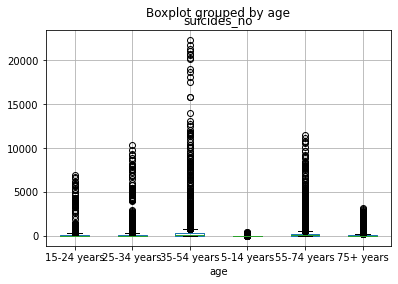

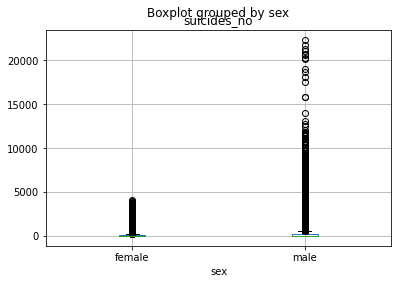

In [51]:
# Creating a box plot of the number of suicides grouped by age

df.boxplot(column = 'suicides_no', by = 'age')

# Creating a box plot of the number of suicides grouped by sex

df.boxplot(column = 'suicides_no', by = 'sex')

From the above graph it can be seen that for all age groups and both sexes, most number of suicides are close to 0. There are also many outliers in the data for all age groups and both the sexes, with the 35-54 age group and males having the furthest outliers.

# Correlation Heatmap of All Continuous Variables

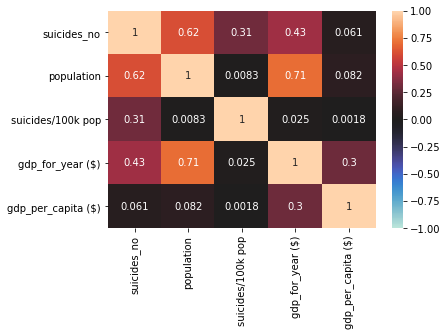

In [50]:
continuous_var = []

# Extracting continuous variable columns from the dataframe
for col in df.columns.values:

    if (df[col].dtypes == 'int64' or df[col].dtypes == 'float64') and len(pd.unique(df[col])) >= 500:

        continuous_var.append(col)

# Creating new dataframe with only continuous variables
df_continuous = df[continuous_var]

# Calculating correlation between all columns
var_corr = df_continuous.corr()

# Plotting correlation heatmap
sb.heatmap(var_corr, xticklabels = var_corr.columns, yticklabels = var_corr.columns, annot = True, vmin=-1, vmax=1, center= 0)        

From this heatmap, we can see that the strongest positive correlation is between the variables population and gdp_per_year. The correlation values between other variables are not as significant. One more thing to note is that none of the variable pairs have a negative correlation.

# Box-Cox Normality Plot

This plot will help identify the value of the transformation parameter which when used to apply a box-cox transformation to the data, gives the distribution closest to the normal distribution.

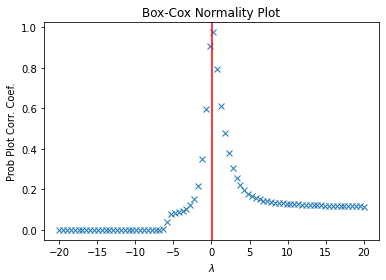

The value of lambda is:  0.0779284465171078


In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Setting up the box-cox plot for the variable population for all lambda values between -20 and 20
prob = stats.boxcox_normplot(df['population'], -20, 20, plot = ax)

# Determining the value of lambda at which the box-cox plot maxima occurs
_, maxlog = stats.boxcox(df['population'])

# Adding the vertical line corresponding to the maxima to the graph
ax.axvline(maxlog, color='r')

plt.show()

print("The value of lambda is: ", maxlog)

From the box-cox plot it's visible that the value of the transformation parameter for population is close to zero, which corresponds to a log-normal distribution which we plotted earlier.